# Metricas de Desempeño

## Indicadores de performance modelo de Clasificación

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
mainpath = "C:/Users/Jorge/PDE_DSML_Notebooks/data/" #Ruta de archivos
filename = "data.csv"
fullpath = os.path.join(mainpath, filename)

In [27]:
data2 = pd.read_csv(fullpath)
data2

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,FAMILIAR,30,3748,93.0,5,3500.00,NaN,0.00,214,Lima,4,UNIVERSITARIA
1,0,18,FAMILIAR,32,4598,9.0,12,900.00,1824.67,1933.75,175,La Libertad,1,TECNICA
2,0,0,FAMILIAR,26,5148,8.0,2,2400.00,2797.38,188.29,187,Lima,0,UNIVERSITARIA
3,0,0,FAMILIAR,36,5179,20.0,12,2700.00,NaN,0.00,187,Ancash,0,TECNICA
4,0,0,FAMILIAR,46,3960,NaN,1,3100.00,2000.00,11010.65,189,Lima,0,TECNICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0,0,PROPIA,43,7917,106.0,12,13660.00,121543.40,8338.46,224,Lima,1,UNIVERSITARIA
8395,1,0,FAMILIAR,29,3352,25.0,0,813.00,2200.00,0.00,197,Lima,1,UNIVERSITARIA
8396,0,0,FAMILIAR,32,6821,19.0,12,3000.00,10087.00,933.68,200,Lima,1,UNIVERSITARIA
8397,1,0,PROPIA,38,3882,7.0,12,3069.23,23994.00,13954.65,221,Lambayeque,1,UNIVERSITARIA


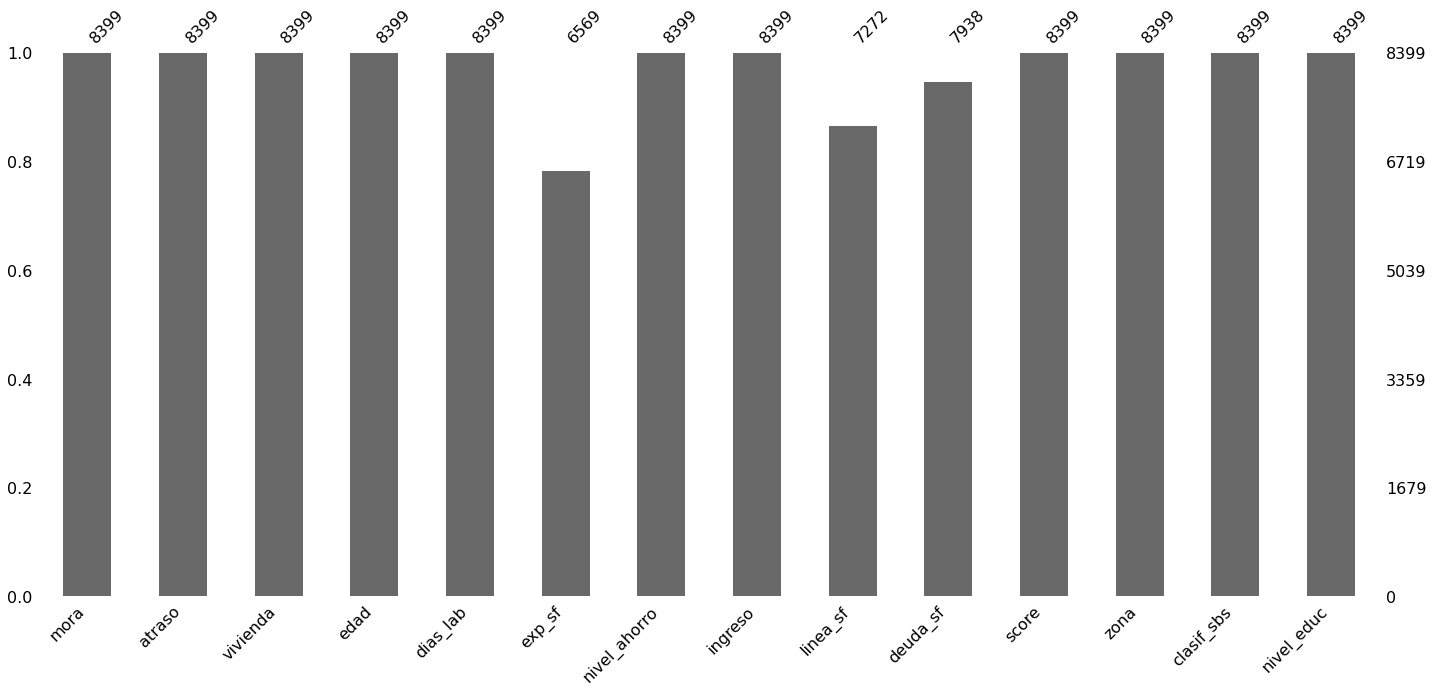

In [28]:
import missingno as msno
msno.bar(data2)

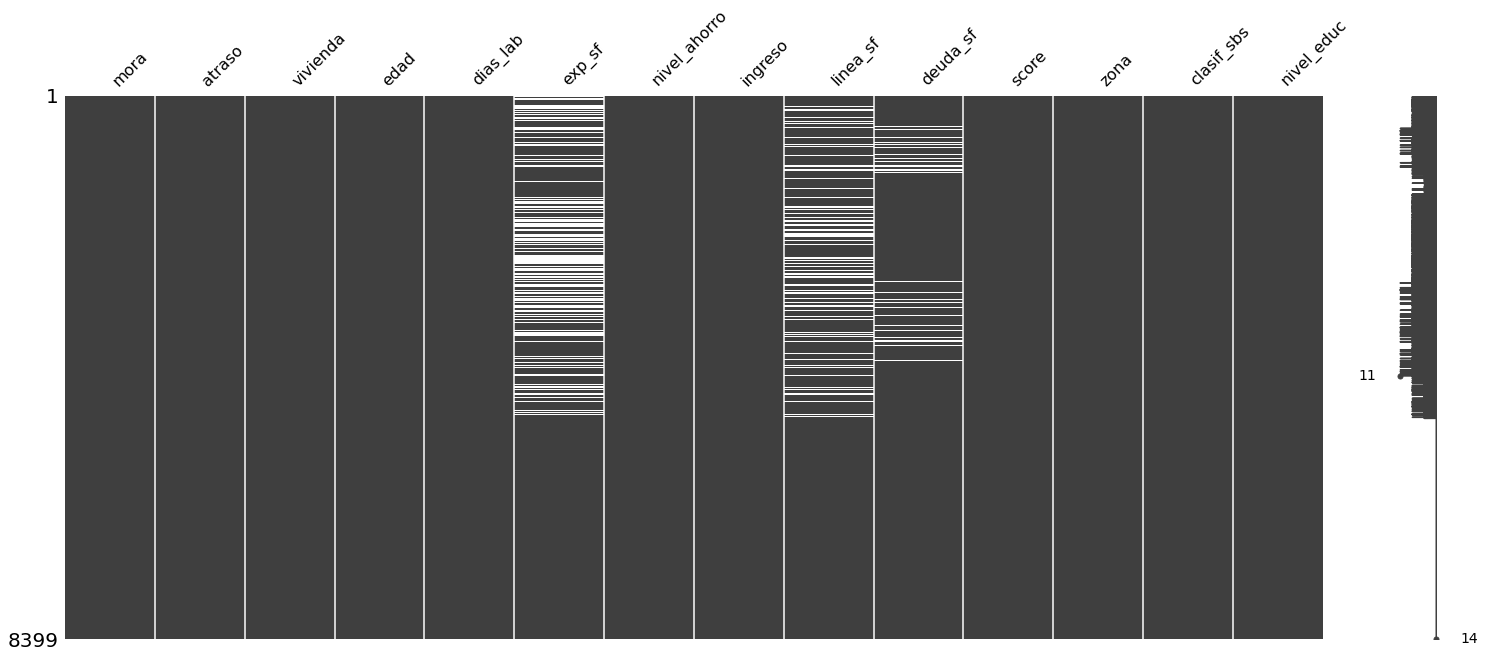

In [29]:
msno.matrix(data2)

In [30]:
#numero de missing por columnas
data2.isnull().sum()

mora               0
atraso             0
vivienda           0
edad               0
dias_lab           0
exp_sf          1830
nivel_ahorro       0
ingreso            0
linea_sf        1127
deuda_sf         461
score              0
zona               0
clasif_sbs         0
nivel_educ         0
dtype: int64

In [31]:
data2["exp_sf"]=data2["exp_sf"].fillna(data2["exp_sf"].median())
data2["linea_sf"]=data2["linea_sf"].fillna(data2["linea_sf"].median())
data2["deuda_sf"]=data2["deuda_sf"].fillna(data2["deuda_sf"].median())

In [32]:
#numero de missing por columnas
data2.isnull().sum()

mora            0
atraso          0
vivienda        0
edad            0
dias_lab        0
exp_sf          0
nivel_ahorro    0
ingreso         0
linea_sf        0
deuda_sf        0
score           0
zona            0
clasif_sbs      0
nivel_educ      0
dtype: int64

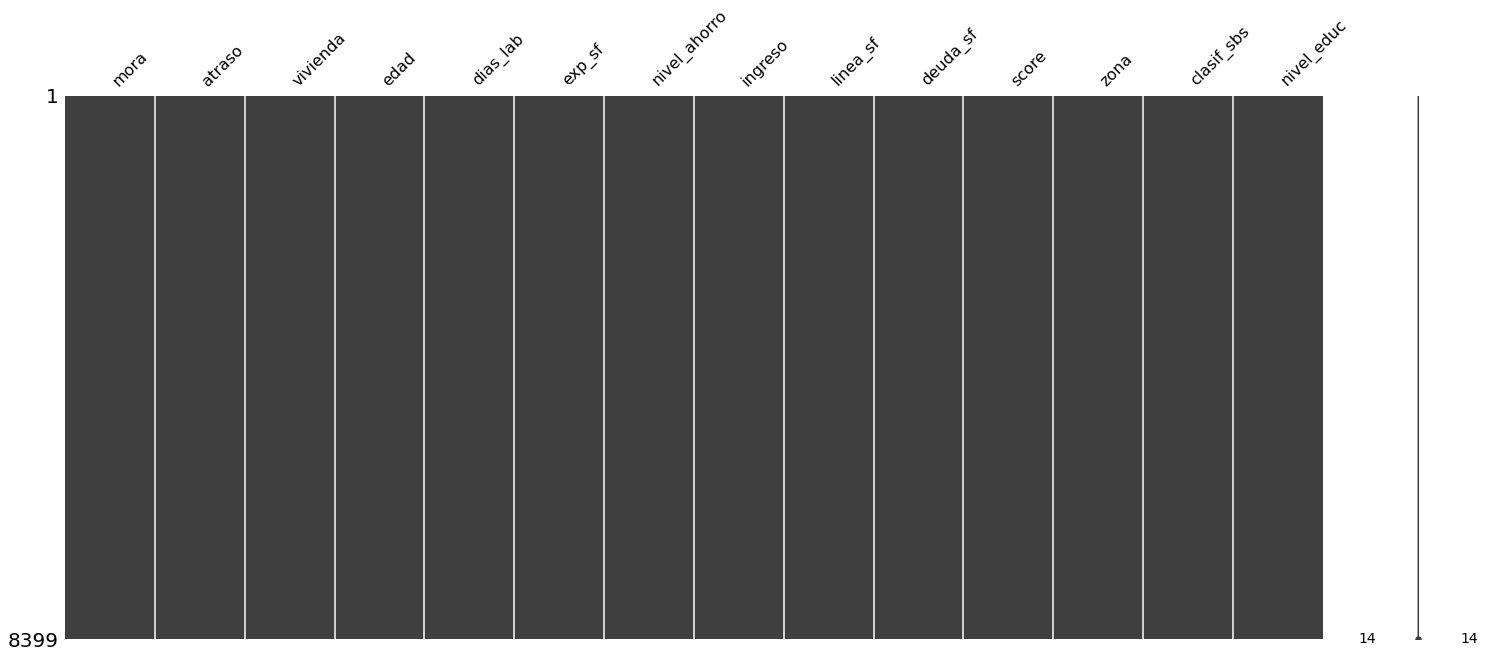

In [33]:
msno.matrix(data2)

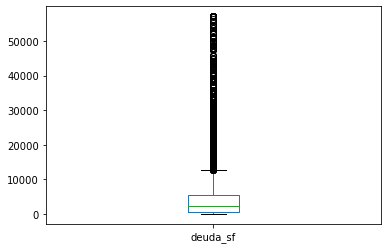

In [34]:
data2.deuda_sf.plot.box() #grid='True'

In [35]:
cotas_deuda=np.percentile(data2[-data2.deuda_sf.isnull()]['deuda_sf'],[1,90])
cotas_deuda

array([    0.  , 14563.87])

In [37]:
data2.loc[data2.deuda_sf>=cotas_deuda[1],'deuda_sf']=cotas_deuda[1]
data2.loc[data2.deuda_sf<=cotas_deuda[0],'deuda_sf']=cotas_deuda[0]
[np.min(data2.deuda_sf),np.max(data2.deuda_sf)]

[0.0, 14563.87]

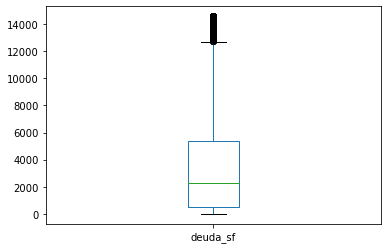

In [38]:
data2.deuda_sf.plot.box() #grid='True'

In [41]:
dummy_viv = pd.get_dummies(data2["vivienda"], prefix="viv")
dummy_n_educ = pd.get_dummies(data2["nivel_educ"], prefix="n_educ")
dummy_n_educ

,n_educ_SECUNDARIA,n_educ_SIN EDUCACION,n_educ_TECNICA,n_educ_UNIVERSITARIA
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
8394,0,0,0,1
8395,0,0,0,1
8396,0,0,0,1
8397,0,0,0,1


In [42]:
data2=pd.concat([data2,dummy_viv,dummy_n_educ],axis=1)
data2

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,...,zona,clasif_sbs,nivel_educ,viv_ALQUILADA,viv_FAMILIAR,viv_PROPIA,n_educ_SECUNDARIA,n_educ_SIN EDUCACION,n_educ_TECNICA,n_educ_UNIVERSITARIA
0,0,235,FAMILIAR,30,3748,93.0,5,3500.00,4030.12,0.00,...,Lima,4,UNIVERSITARIA,0,1,0,0,0,0,1
1,0,18,FAMILIAR,32,4598,9.0,12,900.00,1824.67,1933.75,...,La Libertad,1,TECNICA,0,1,0,0,0,1,0
2,0,0,FAMILIAR,26,5148,8.0,2,2400.00,2797.38,188.29,...,Lima,0,UNIVERSITARIA,0,1,0,0,0,0,1
3,0,0,FAMILIAR,36,5179,20.0,12,2700.00,4030.12,0.00,...,Ancash,0,TECNICA,0,1,0,0,0,1,0
4,0,0,FAMILIAR,46,3960,20.0,1,3100.00,2000.00,11010.65,...,Lima,0,TECNICA,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0,0,PROPIA,43,7917,106.0,12,13660.00,121543.40,8338.46,...,Lima,1,UNIVERSITARIA,0,0,1,0,0,0,1
8395,1,0,FAMILIAR,29,3352,25.0,0,813.00,2200.00,0.00,...,Lima,1,UNIVERSITARIA,0,1,0,0,0,0,1
8396,0,0,FAMILIAR,32,6821,19.0,12,3000.00,10087.00,933.68,...,Lima,1,UNIVERSITARIA,0,1,0,0,0,0,1
8397,1,0,PROPIA,38,3882,7.0,12,3069.23,23994.00,13954.65,...,Lambayeque,1,UNIVERSITARIA,0,0,1,0,0,0,1


In [43]:
# Separando data en X e y
X2=data2
X2=X2.drop(['nivel_educ',"vivienda","zona"], axis=1)
X2.head
Y2=data2["mora"]

In [46]:
# Separando en train y test
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X2,Y2,test_size=0.2,
                                           random_state=4)

In [47]:
from sklearn import linear_model
logit_model = linear_model.LogisticRegression()
logit_model.fit(Xtrain,Ytrain)

C:\Users\Jorge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
logit_model.score(Xtrain,Ytrain)

0.7237684179193332

In [53]:
pd.DataFrame(list(zip(X2.columns, np.transpose(logit_model.coef_))))

,0,1
0,mora,[0.01831135834707024]
1,atraso,[0.035921629749473764]
2,edad,[0.01132103783072573]
3,dias_lab,[-4.6595545083452696e-05]
4,exp_sf,[-0.014705146361612766]
5,nivel_ahorro,[-0.008513842555655859]
6,ingreso,[-2.371369310916799e-05]
7,linea_sf,[-8.97727905443443e-06]
8,deuda_sf,[3.9337286271685935e-05]
9,score,[0.0058818006426391125]


In [54]:
def Gini(y_true,y_pred,signo='+'):
    from sklearn.metrics import roc_auc_score
    return 2*roc_auc_score(y_true, y_pred)-1

In [55]:
probs = logit_model.predict_proba(Xtrain)[:,1:]
m=pd.DataFrame(probs,columns = ['Probs'])
print(m)

         Probs
0     0.908419
1     0.737245
2     0.700609
3     0.805681
4     0.672244
...        ...
6714  0.867202
6715  0.811454
6716  0.772554
6717  0.813953
6718  0.720648

[6719 rows x 1 columns]


In [56]:
ytrain2=Ytrain.reset_index()
ytrain2['Probs']=m
ytrain2

,index,mora,Probs
0,5719,1,0.908419
1,2404,1,0.737245
2,4625,1,0.700609
3,6015,0,0.805681
4,5346,0,0.672244
...,...,...,...
6714,456,0,0.867202
6715,6017,1,0.811454
6716,709,0,0.772554
6717,8366,1,0.813953


In [57]:
1*Gini(ytrain2["mora"],ytrain2["Probs"])
#Estandares: Gini>0.5 Bueno | 0.4<=Gini<=0.5 Aceptable | Gini<0.4 No es tan bueno

0.3296881261313547

In [106]:
#pip install ggplot

In [107]:
#pip install tslib

In [108]:
pip install plot_metric

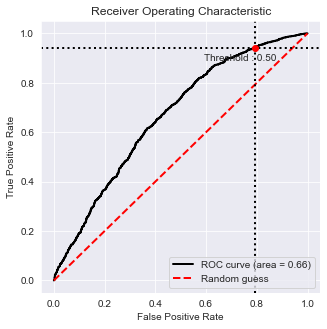

In [63]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(ytrain2["mora"], ytrain2["Probs"], labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [67]:
threshold = 0.5

ytrain2["prediction"]=np.where(probs>threshold, 1, 0)
ytrain2

,index,mora,Probs,prediction
0,5719,1,0.908419,1
1,2404,1,0.737245,1
2,4625,1,0.700609,1
3,6015,0,0.805681,1
4,5346,0,0.672244,1
...,...,...,...,...
6714,456,0,0.867202,1
6715,6017,1,0.811454,1
6716,709,0,0.772554,1
6717,8366,1,0.813953,1


In [68]:
confusion_matrix = pd.crosstab(ytrain2.prediction, ytrain2.mora)
confusion_matrix

mora,0,1
prediction,,
0,412,279
1,1577,4451


In [69]:
TN=confusion_matrix[0][0]
TP=confusion_matrix[1][1]
FN=confusion_matrix[0][1]
FP=confusion_matrix[1][0]
final=(TP+TN)/(TN+TP+FN+FP)
final

0.7237684179193332

In [70]:
sens = TP/(TP+FN)
sens

0.7383875248838753

In [71]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.4037626628075254

In [77]:
#Forma alternativa de calcular la matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix(ytrain2["mora"], ytrain2["prediction"])

array([[ 412, 1577],
       [ 279, 4451]], dtype=int64)

In [78]:
prob_f = logit_model.predict_proba(Xtrain)
prob_f2 = prob_f[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytrain2["mora"], prob_f2)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.6648440630656773

In [82]:
Gini=2*roc_auc -1
Gini

0.3296881261313547

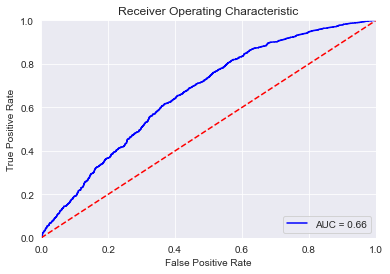

In [79]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
ks=max(tpr-fpr)
print("el ratio ks es %0.2f:" % ks)

el ratio ks es 0.25:


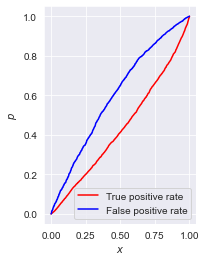

In [84]:
import matplotlib.pyplot as plt
import numpy as np
#non defaults
# sort the data:
data_sorted = np.sort(fpr)

# calculate the proportional values of samples
p = 1. * np.arange(len(fpr)) / (len(fpr) - 1)

#defaults
data_sorted2= np.sort(tpr)

# calculate the proportional values of samples
p2 = 1. * np.arange(len(tpr)) / (len(tpr) - 1)
# plot the sorted data:
fig = plt.figure()
#ax1 = fig.add_subplot(121)
#ax1.plot(p, data_sorted)
#ax1.set_xlabel('$p$')
#ax1.set_ylabel('$x$')

ax1 = fig.add_subplot(122)
#def
ax1.plot(data_sorted2, p2,'r',label = 'True positive rate')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$p$')
#nodef
ax1.plot(data_sorted, p,'b', label = 'False positive rate')
plt.legend(loc = 'lower right')

## Indicadores de performance modelo de regresión

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
mainpath = "C:/Users/Jorge/PDE_DSML_Notebooks/data/" #Ruta de archivos
filename = "Advertising.csv"
fullpath = os.path.join(mainpath, filename)

In [87]:
#Cargando nuestra información:
data = pd.read_csv(fullpath)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [88]:
X=data.iloc[:,0:3]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [89]:
Y=data.iloc[:,3:]
Y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [90]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           4.83e-98
Time:                        05:48:10   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
sales_pred = lm.predict(data)
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [92]:
# Separando en train y test
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,
                                           random_state=4)
print(len(Xtrain))
print(len(Xtest))

160
40


In [93]:
# Importando librería
from sklearn.linear_model import LinearRegression
# Generando objeto
reg=LinearRegression()
# Entrenando modelo
reg.fit(Xtrain,ytrain)

# Validación cruzada: Cross Validation (K-Fold)
#from sklearn.model_selection import cross_val_score
#cv_reg_train=cross_val_score(reg,Xtrain,ytrain.ingreso,cv=5)
#np.mean(cv_reg_train)
#reg.score(Xtrain,ytrain.ingreso)

LinearRegression()

In [94]:
# Performance (R-cuadrado)
reg.score(Xtrain,ytrain)

0.8911672911176578

In [98]:
ytrain['Sales_est']=reg.predict(Xtrain)
ytrain

<ipython-input-98-eef4995ce558>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytrain['Sales_est']=reg.predict(Xtrain)


,Sales,Sales_est
26,15.0,14.891650
134,10.8,11.647427
180,10.5,10.781073
158,7.3,10.170949
189,6.7,6.081970
...,...,...
104,20.7,20.195086
129,9.7,7.966108
183,26.2,24.051443
174,11.5,13.974632


In [99]:
# Predicción
a=pd.DataFrame(reg.predict(data.iloc[:,0:3]),columns = ['Sales_est'])
b=pd.DataFrame(reg.predict(Xtrain),columns = ['Sales_est'])
a.iloc[134:135,:]

,Sales_est
26,14.89165


## RECM: Raiz del Error Cuadrático Medio

In [100]:
#Performance (RECM: Raiz del Error Cuadrático Medio)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytrain.Sales,ytrain.Sales_est))

1.7196826677158092

## Suma de residuos al cuadrado (RSS) :

In [101]:
RSS = sum((ytrain.Sales-ytrain.Sales_est)**2)
RSS
np.sqrt(RSS/len(ytrain))

1.7196826677158088

## Error estandar Residual

In [102]:
RSE = np.sqrt(RSS/(len(ytrain)-3))
RSE

1.7360350102554887

## Error

In [103]:
sales_mean = np.mean(ytrain.Sales)
error = RSE/sales_mean
error

0.126995977341294

In [104]:
# Validación cruzada: Cross Validation (K-Fold)
from sklearn.model_selection import cross_val_score
cv_reg_train=cross_val_score(reg,Xtrain,ytrain.Sales,cv=10)
np.mean(cv_reg_train)

0.8781523466976994

## R2

In [105]:
reg.score(Xtrain,ytrain.Sales)

0.8911672911176578